# Practice with the Keras Functional API

> In this post, it will demonstrate how to build models with the Functional syntax. You'll build one using the Sequential API and see how you can do the same with the Functional API. Both will arrive at the same architecture and you can train and evaluate it as usual. This is the summary of lecture "Custom Models, Layers and Loss functions with Tensorflow" from DeepLearning.AI.

- toc: true 
- badges: true
- comments: true
- author: Chanseok Kang
- categories: [Python, Coursera, Tensorflow, DeepLearining.AI]
- image: 

## Packages

In [1]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model

import matplotlib.pyplot as plt
import numpy as np

## Prepare the Data

We will use mnist dataset for the check.

In [2]:
mnist = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

## Sequential API

Here is how we use the `Sequential()` class to build a model.

In [3]:
def build_model_with_sequential():
    # instantiate a Sequential class and linearly stack the layers of your model
    seq_model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(128, activation=tf.nn.relu),
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])
    return seq_model

## Functional API

And here is how you build the same model above with the functional syntax.

In [4]:
def build_model_wtih_functional():
    # instantiate the input Tensor
    input_layer = tf.keras.Input(shape=(28, 28))
    
    # stack the layers using the syntax: new_layer()(previous_layer)
    flatten_layer = tf.keras.layers.Flatten()(input_layer)
    first_dense = tf.keras.layers.Dense(128, activation=tf.nn.relu)(flatten_layer)
    output_layer = tf.keras.layers.Dense(10, activation=tf.nn.softmax)(first_dense)
    
    # declare inputs and outputs
    func_model = Model(inputs=input_layer, outputs=output_layer)
    return func_model

## Build the model and visualize the model graph

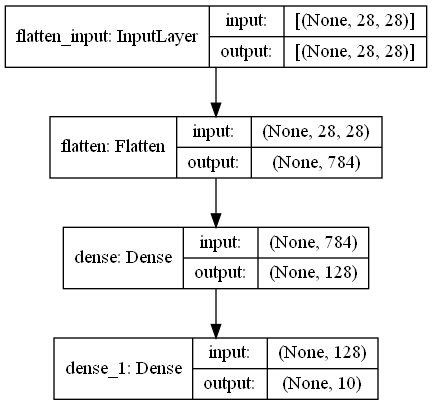

In [5]:
model = build_model_with_sequential()

plot_model(model, show_shapes=True, show_layer_names=True)

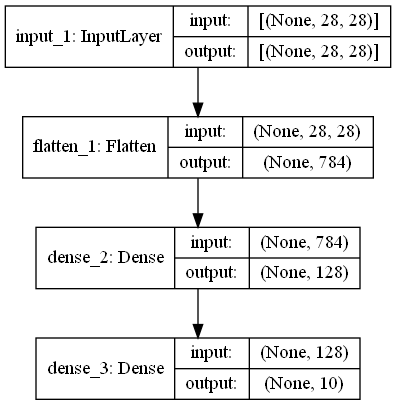

In [6]:
model = build_model_wtih_functional()

plot_model(model, show_shapes=True, show_layer_names=True, to_file='./model_functional.png')

## Training the model

Regardless if you built it with the Sequential or Functional API, you'll follow the same steps when training and evaluating your model.

In [7]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2556 - accuracy: 0.9274
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1132 - accuracy: 0.9659
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0774 - accuracy: 0.9767
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0577 - accuracy: 0.9824
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0453 - accuracy: 0.9862


In [8]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0781 - accuracy: 0.9745


[0.0780709907412529, 0.9745000004768372]